<a href="https://colab.research.google.com/github/ianmuchai/smartwatch_dataset/blob/main/Smartwatch_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded=files.upload()

Saving smartwatches.csv to smartwatches.csv


In [3]:
file_name='smartwatches.csv'

In [4]:
data=pd.read_csv(file_name)

In [5]:
data.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [6]:
# Dropping the 'Unnamed: 0' column
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Filling missing values in 'Rating' with the median
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [8]:
# Filling missing values in categorical columns with 'Unknown'
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

In [9]:
# Handling other missing values
# Filling 'Current Price' and 'Original Price' with their median values
data['Current Price'] = data['Current Price'].fillna(data['Current Price'].median())
data['Original Price'] = data['Original Price'].fillna(data['Original Price'].median())

In [11]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())
data['Battery Life (Days)'] = data['Battery Life (Days)'].fillna(data['Battery Life (Days)'].median())

In [12]:
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,Unknown,Unknown,Unknown,Unknown,8.0,Yes,Unknown,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,Unknown,Unknown,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,Unknown,Unknown,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,Unknown,Unknown,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,Unknown,Unknown,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [14]:
# Convert to appropriate data types
categorical_columns = ['Brand', 'Model Name', 'Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen', 'Bluetooth']
data[categorical_columns] = data[categorical_columns].astype('category')

In [17]:
print(data.dtypes)

Brand                  category
Current Price           float64
Original Price          float64
Discount Percentage     float64
Rating                  float64
Number OF Ratings       float64
Model Name             category
Dial Shape             category
Strap Color            category
Strap Material         category
Touchscreen            category
Battery Life (Days)     float64
Bluetooth              category
Display Size             object
Weight                   object
dtype: object


In [21]:
# Descriptive Statistics
descriptive_stats = data.describe()
print(descriptive_stats)

       Current Price  Original Price  Discount Percentage      Rating  \
count     450.000000      450.000000           377.000000  450.000000   
mean    12553.142222    13527.666667            48.236894    4.032222   
std     17609.161734    14346.636604            24.109830    0.546914   
min      1199.000000     1669.000000           -79.688436    1.000000   
25%      2199.000000     5999.000000            33.337037    3.900000   
50%      3999.000000     7999.000000            54.550414    4.100000   
75%     16999.000000    13749.000000            66.677780    4.300000   
max    139990.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  
count         391.000000           450.000000  
mean        11594.726343            14.320778  
std         40423.889227             7.490319  
min             1.000000             0.750000  
25%            68.500000             8.000000  
50%           996.000000            17.500000  
75%   

In [25]:
# Brand Analysis
brand_distribution = data['Brand'].value_counts()
print(brand_distribution)

fire-boltt    60
noise         43
garmin        41
pebble        33
zebronics     33
boat          32
samsung       30
apple         26
dizo          25
fossil        24
gizmore       23
fitbit        21
huawei        15
honor         14
amazfit       14
ambrane       11
crossbeats     4
hammer         1
Name: Brand, dtype: int64


In [27]:
# Price Analysis
price_stats = data[['Current Price', 'Original Price']].describe()
print(price_stats)

       Current Price  Original Price
count     450.000000      450.000000
mean    12553.142222    13527.666667
std     17609.161734    14346.636604
min      1199.000000     1669.000000
25%      2199.000000     5999.000000
50%      3999.000000     7999.000000
75%     16999.000000    13749.000000
max    139990.000000    96390.000000


In [28]:
# Ratings Analysis
rating_stats = data['Rating'].describe()
print(rating_stats)

count    450.000000
mean       4.032222
std        0.546914
min        1.000000
25%        3.900000
50%        4.100000
75%        4.300000
max        5.000000
Name: Rating, dtype: float64


In [30]:
# Feature Analysis
# Analyzing features like Battery Life, Touchscreen availability in relation to price and ratings
battery_price_rating = data.groupby('Battery Life (Days)').agg({'Current Price':'mean', 'Rating':'mean'})
touchscreen_price_rating = data.groupby('Touchscreen').agg({'Current Price':'mean', 'Rating':'mean'})
print(battery_price_rating)
print(touchscreen_price_rating)

                     Current Price    Rating
Battery Life (Days)                         
0.75                   9165.666667  4.066667
3.50                  15302.657534  4.145205
3.60                   8317.500000  4.116667
8.00                   7474.198113  4.021698
12.50                 17536.583333  4.125000
17.50                 20835.986486  4.091892
22.00                 10851.426136  3.956818
             Current Price    Rating
Touchscreen                         
No            28950.208333  4.404167
Unknown       12903.081081  3.867568
Yes           11508.213368  4.024936


In [35]:
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.width', None)        # Utilizes the maximum window width

In [36]:
# Correlation Analysis
correlation_matrix = data.corr()

<ipython-input-36-7c00a7d52ca1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<ipython-input-37-64523635d3e2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


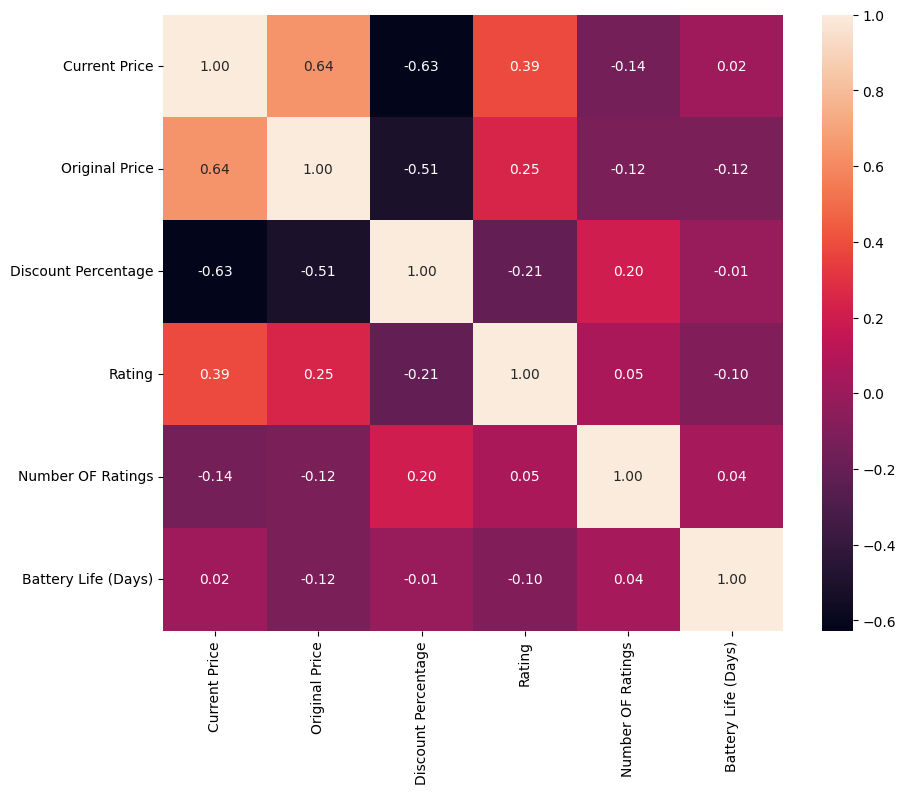

In [37]:
#Visualizing the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

Text(0.5, 0, 'Brand')

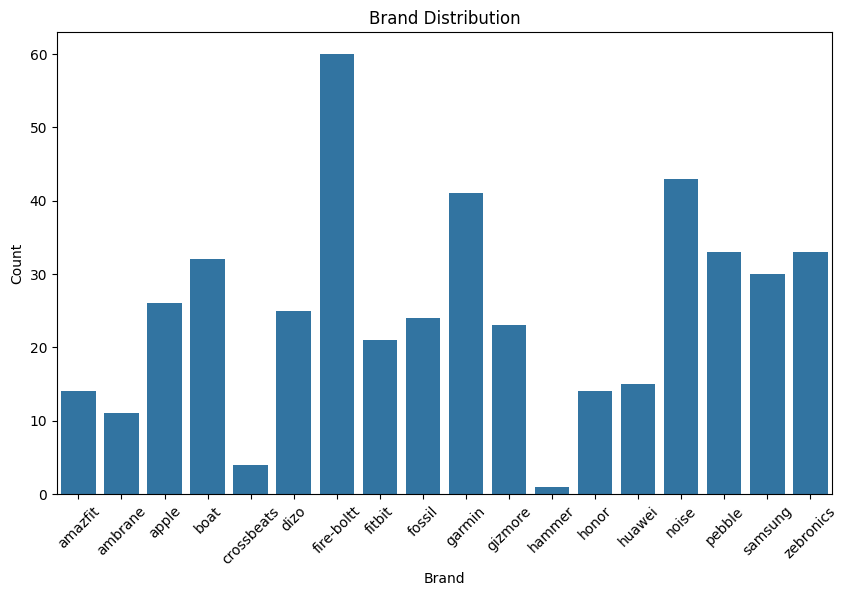

In [38]:
# Plotting
# Brand Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_distribution.index, y=brand_distribution.values)
plt.xticks(rotation=45)
plt.title('Brand Distribution')
plt.ylabel('Count')
plt.xlabel('Brand')

Text(0.5, 1.0, 'Correlation Matrix')

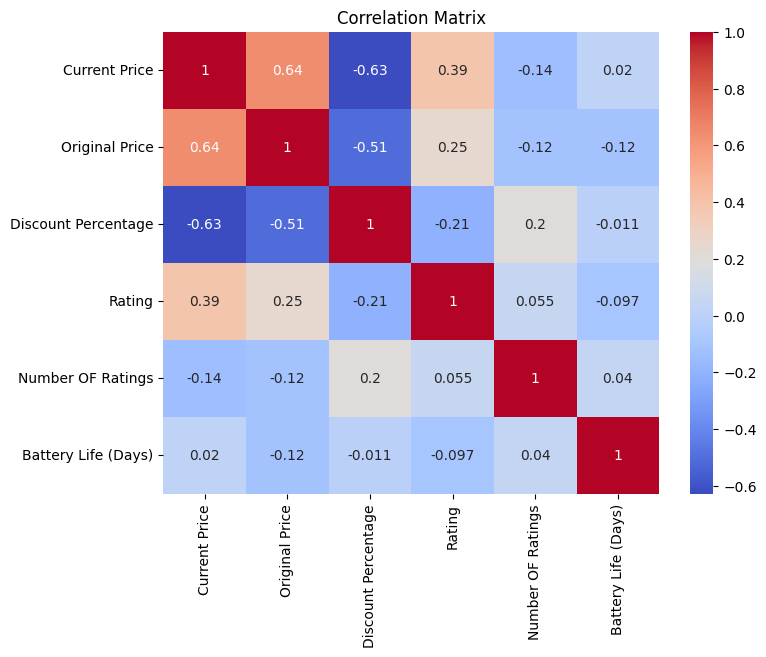

In [39]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [42]:
# Price Comparison: Current Price vs Original Price
data['Discount Amount'] = data['Original Price'] - data['Current Price']
data['Discount Percentage'] = (data['Discount Amount'] / data['Original Price']) * 100

In [43]:
# Popularity Analysis: Number of Ratings
popularity_by_brand = data.groupby('Brand')['Number OF Ratings'].sum()

# Rating Analysis
average_rating_by_brand = data.groupby('Brand')['Rating'].mean()

Text(0, 0.5, 'Rating')

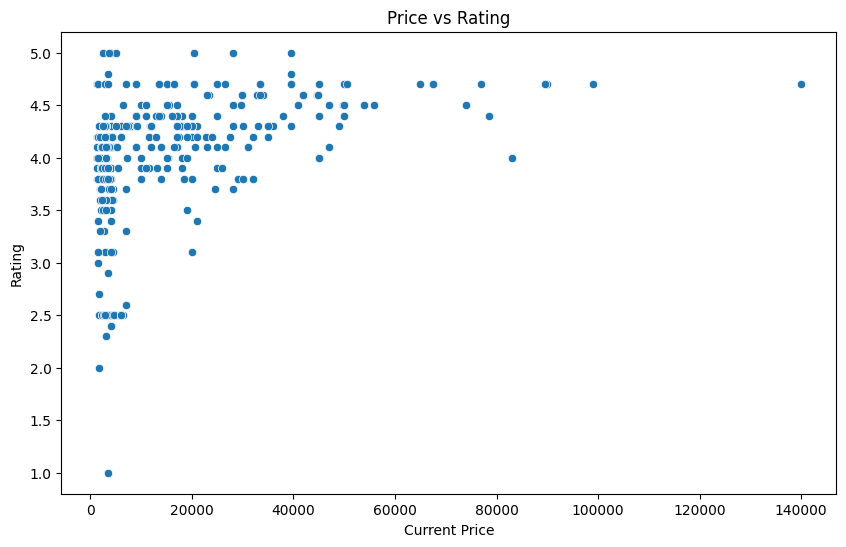

In [45]:
# Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Current Price', y='Rating', data=data)
plt.title('Price vs Rating')
plt.xlabel('Current Price')
plt.ylabel('Rating')

In [46]:
# Feature Analysis: Battery Life and Rating
battery_rating_comparison = data.groupby('Battery Life (Days)')['Rating'].mean()

In [47]:
# Brand Analysis: Price and Rating
brand_price_rating = data.groupby('Brand').agg({'Current Price':'mean', 'Rating':'mean'})

In [48]:
# Display Results
print("Popularity by Brand:\n", popularity_by_brand)
print("\nAverage Rating by Brand:\n", average_rating_by_brand)
print("\nBattery Life and Rating Comparison:\n", battery_rating_comparison)
print("\nBrand Analysis - Price and Rating:\n", brand_price_rating)

Popularity by Brand:
 Brand
amazfit         27536.0
ambrane        116132.0
apple          172184.0
boat          1414885.0
crossbeats       9382.0
dizo           346145.0
fire-boltt     490099.0
fitbit          16846.0
fossil          14259.0
garmin          29695.0
gizmore         13480.0
hammer            516.0
honor           59655.0
huawei          14802.0
noise         1592535.0
pebble          57403.0
samsung        129894.0
zebronics       28090.0
Name: Number OF Ratings, dtype: float64

Average Rating by Brand:
 Brand
amazfit       4.142857
ambrane       4.081818
apple         4.553846
boat          4.000000
crossbeats    4.100000
dizo          3.876000
fire-boltt    3.506667
fitbit        4.428571
fossil        4.066667
garmin        4.441463
gizmore       3.869565
hammer        3.600000
honor         4.235714
huawei        4.313333
noise         4.069767
pebble        3.954545
samsung       4.223333
zebronics     3.636364
Name: Rating, dtype: float64

Battery Life and Rating

Text(0, 0.5, 'Frequency')

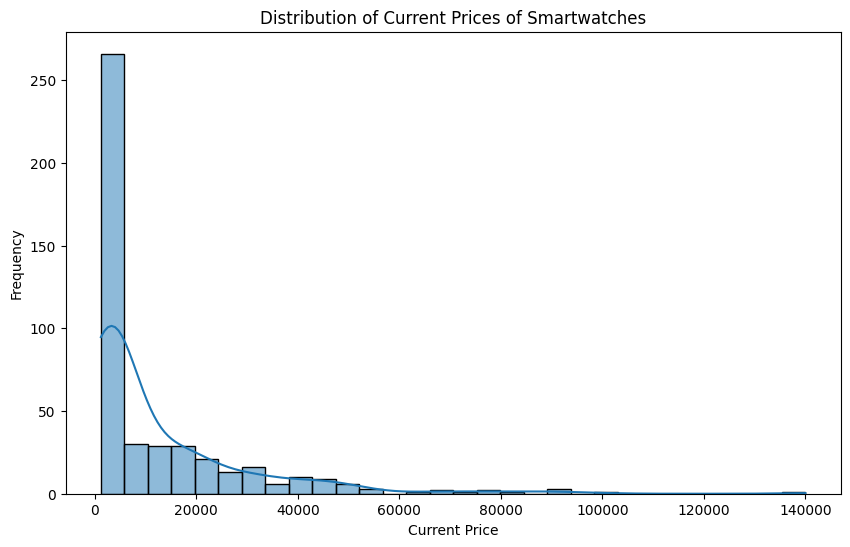

In [49]:
# Visualization 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Current Price'], bins=30, kde=True)
plt.title('Distribution of Current Prices of Smartwatches')
plt.xlabel('Current Price')
plt.ylabel('Frequency')


Text(0, 0.5, 'Total Number of Ratings')

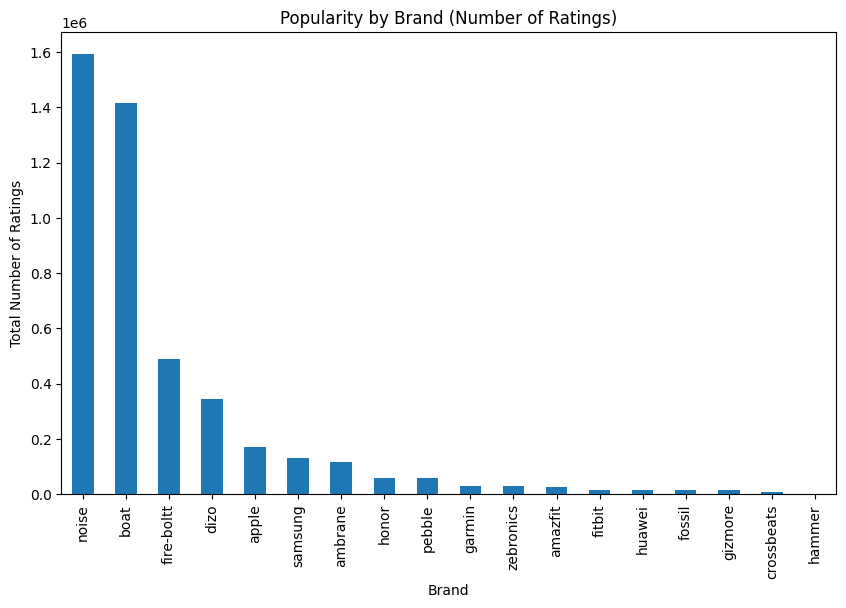

In [50]:
# Visualization 2: Popularity by Brand
popularity_by_brand = data.groupby('Brand')['Number OF Ratings'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
popularity_by_brand.plot(kind='bar')
plt.title('Popularity by Brand (Number of Ratings)')
plt.xlabel('Brand')
plt.ylabel('Total Number of Ratings')

Text(0, 0.5, 'Average Rating')

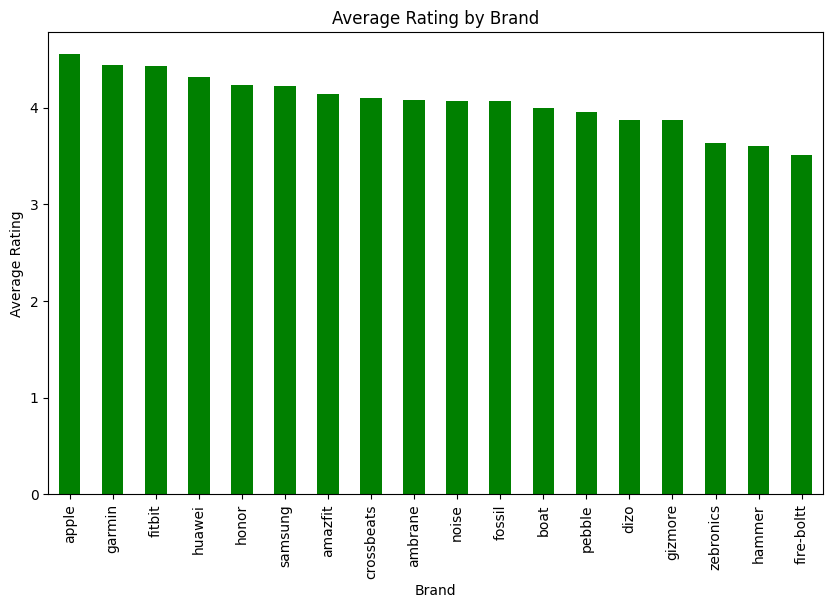

In [51]:
# Visualization 3: Average Rating by Brand
average_rating_by_brand = data.groupby('Brand')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_rating_by_brand.plot(kind='bar', color='green')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')

Text(0, 0.5, 'Rating')

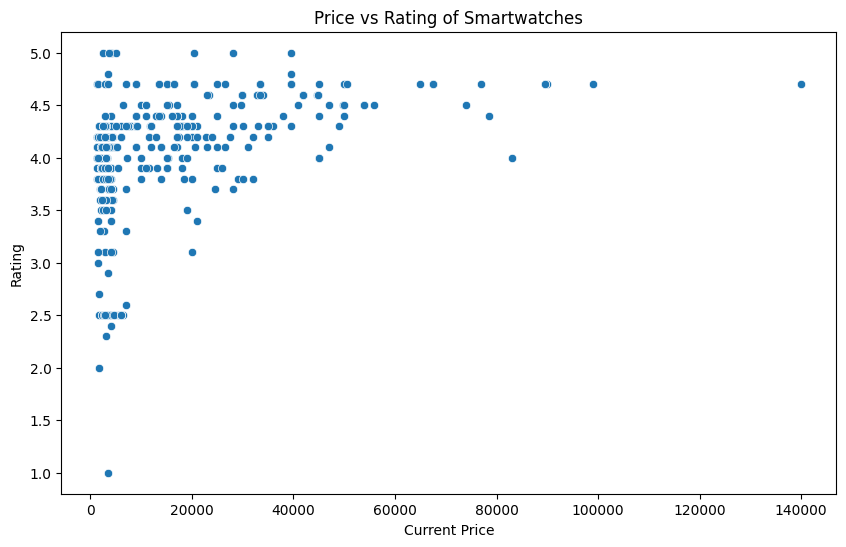

In [52]:
# Visualization 4: Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Current Price', y='Rating', data=data)
plt.title('Price vs Rating of Smartwatches')
plt.xlabel('Current Price')
plt.ylabel('Rating')

Text(0, 0.5, 'Average Rating')

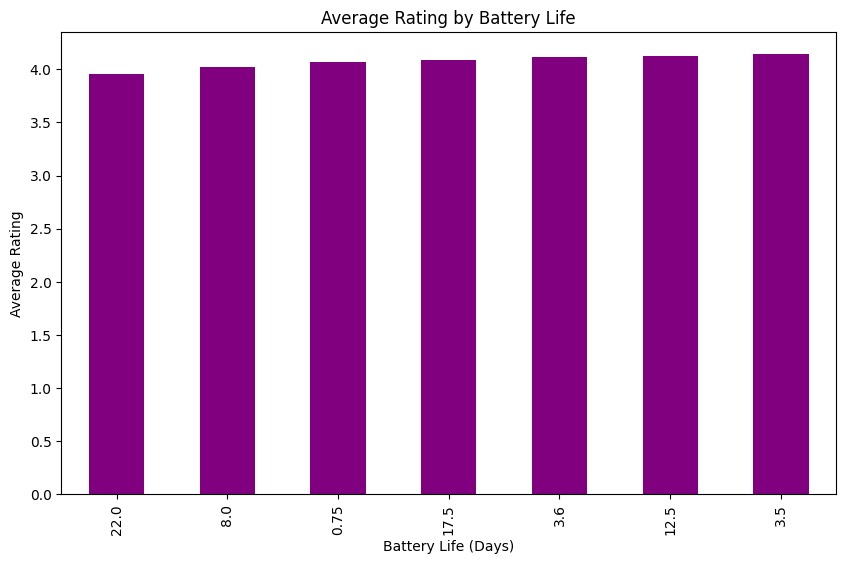

In [53]:
# Visualization 5: Battery Life vs Average Rating
battery_rating_comparison = data.groupby('Battery Life (Days)')['Rating'].mean().sort_values()
plt.figure(figsize=(10, 6))
battery_rating_comparison.plot(kind='bar', color='purple')
plt.title('Average Rating by Battery Life')
plt.xlabel('Battery Life (Days)')
plt.ylabel('Average Rating')

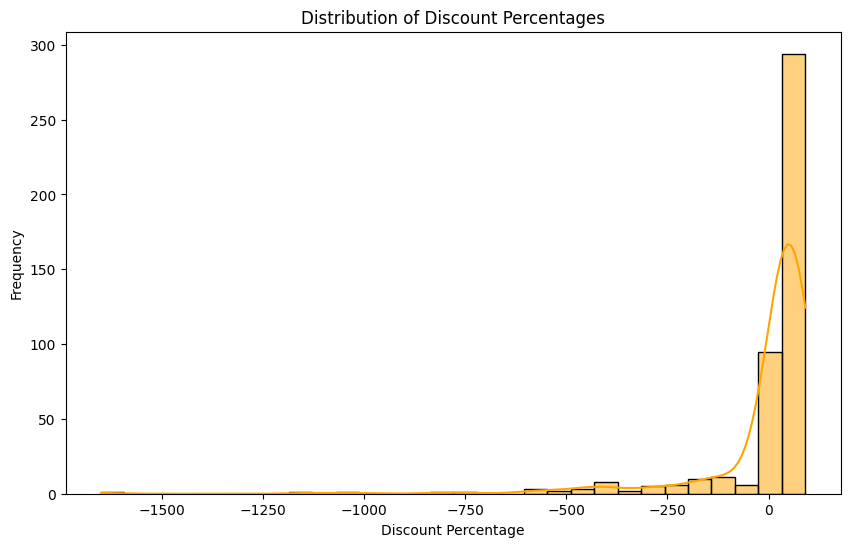

In [54]:
# Visualization 6: Discount Percentage Distribution
data['Discount Percentage'] = (data['Original Price'] - data['Current Price']) / data['Original Price'] * 100
plt.figure(figsize=(10, 6))
sns.histplot(data['Discount Percentage'], bins=30, kde=True, color='orange')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

plt.show()